## DFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def g(N, s):
    a=[]
    for i in range(N):
        a.append((i%s) + 1)
    return np.array(a)

In [3]:
def DFT(N,a):
    omega = np.exp(-2j* np.pi/N)
    f=[]
    for y in range(N):
        fy = 0
        for x in range(N):
            fy+=a[x]*(omega**(y*x))
        f.append(fy)
    f = np.array(f)
    f[np.abs(f) < 1e-8] = 0
    f = abs(f)/sum(abs(f))
    f = np.round(f, 4)
    return f
        

In [4]:
def plot(dft):
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(dft)), dft)
    plt.xlabel('DFT Indices')
    plt.title('Discrete Foutier Transform')

    # Display the plot
    plt.show()

In [5]:
def ContiFrac(x):
    k = []
    z = []
    k_tmp = 1
    print(f"\nContinuous Fractorization")
    for i in range(3):
        ki = int(x+0.5)
        k.append(ki)
        z.append(k_tmp*ki+1)
        k_tmp = ki
        zi = math.floor(x)
        print(f"{x} = {zi} +", end = " ")
        x -= zi
        x = 1/x
        print(f"1/{x}")
    z[1]=k[1]
    k[1]=1
    return z,k

In [6]:
def findPeak(arr):
    d = []
    for i in range(1,len(arr)-1):
        if(arr[i]>arr[i-1] and arr[i]>arr[i+1]):
            d.append(i)
            if(len(d)>5):
                return d

In [7]:
def findDeno(d,N):
    for i in range(len(d)):
        z,k = ContiFrac(d[i]/N)
        for j in range(1,len(z)):
            if(abs(k[j]/z[j] - d[i]/N)<1/(2*N) and z[j]<2**N):
                print(f"z = {z[j]}")
                return z[j]

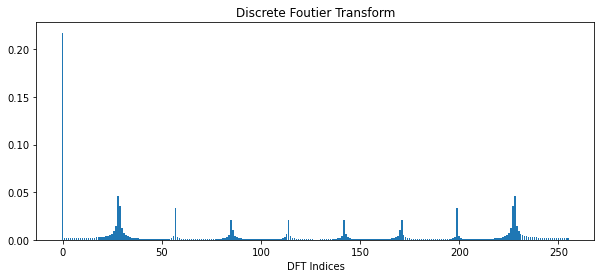

d = [28, 57, 85, 114, 142, 171]

Continuous Fractorization
0.109375 = 0 + 1/9.142857142857142
9.142857142857142 = 9 + 1/7.000000000000025
7.000000000000025 = 7 + 1/40210710958665.14
z = 9


In [8]:
N = 256
s = 9
a = g(N,s)
dft = DFT(N,a)
plot(dft)
d = findPeak(dft)
print(f"d = {d}")
z = findDeno(d,N)

## Factoring & find period

In [1]:
def G(a,M):
    g = []
    for x in range (M):
        g.append((a**x)%M)
    return np.array(g)

In [10]:
def Find1(g):
    indices = np.where(g == 1)[0]
    return indices[1]

In [11]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

In [16]:
def findPQ(z,M):
    p = gcd(z//2+1,M)
    q = gcd(z//2-1,M)
    print(f"p = {p}, q = {q}")
    return p,q

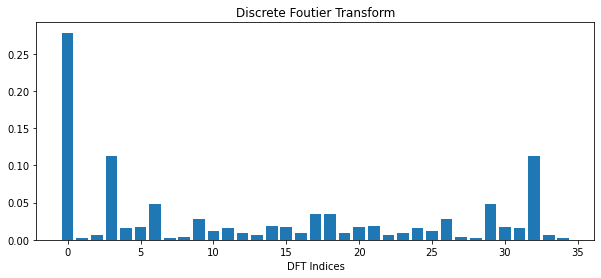

d = [3, 6, 9, 11, 14, 21]

Continuous Fractorization
0.08571428571428572 = 0 + 1/11.666666666666666
11.666666666666666 = 11 + 1/1.5000000000000013
1.5000000000000013 = 1 + 1/1.9999999999999947
z = 12
p = 7, q = 5


In [17]:
M=35
a=2
arr = G(a,M)
dft = DFT(M,arr)
plot(dft)
d = findPeak(dft)
print(f"d = {d}")
z = findDeno(d,M)
p,q = findPQ(z,M)